# Proyek Klasifikasi Gambar: One Piece
- **Nama:** Bima Rakajati
- **Email:** bimandugal@gmail.com
- **ID Dicoding:** [bimarakajati](https://www.dicoding.com/users/bimarakajati/)

# Import Semua Packages/Library yang Digunakan

In [3]:
from pathlib import Path
from PIL import Image
from tensorflow.keras import preprocessing
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.callbacks import Callback
from tensorflow.keras.layers import Conv2D, Dense, Dropout, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

2024-09-18 02:24:54.816873: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-09-18 02:24:54.816953: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-18 02:24:54.818818: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [4]:
# Mencetak versi TensorFlow yang sedang digunakan
print(tf.__version__)

2.15.0


# Data Preparation
Source: https://www.kaggle.com/datasets/ibrahimserouis99/one-piece-image-classifier

## Data Loading

In [5]:
data_path = '/kaggle/input/one-piece-image-classifier/Data/Data'

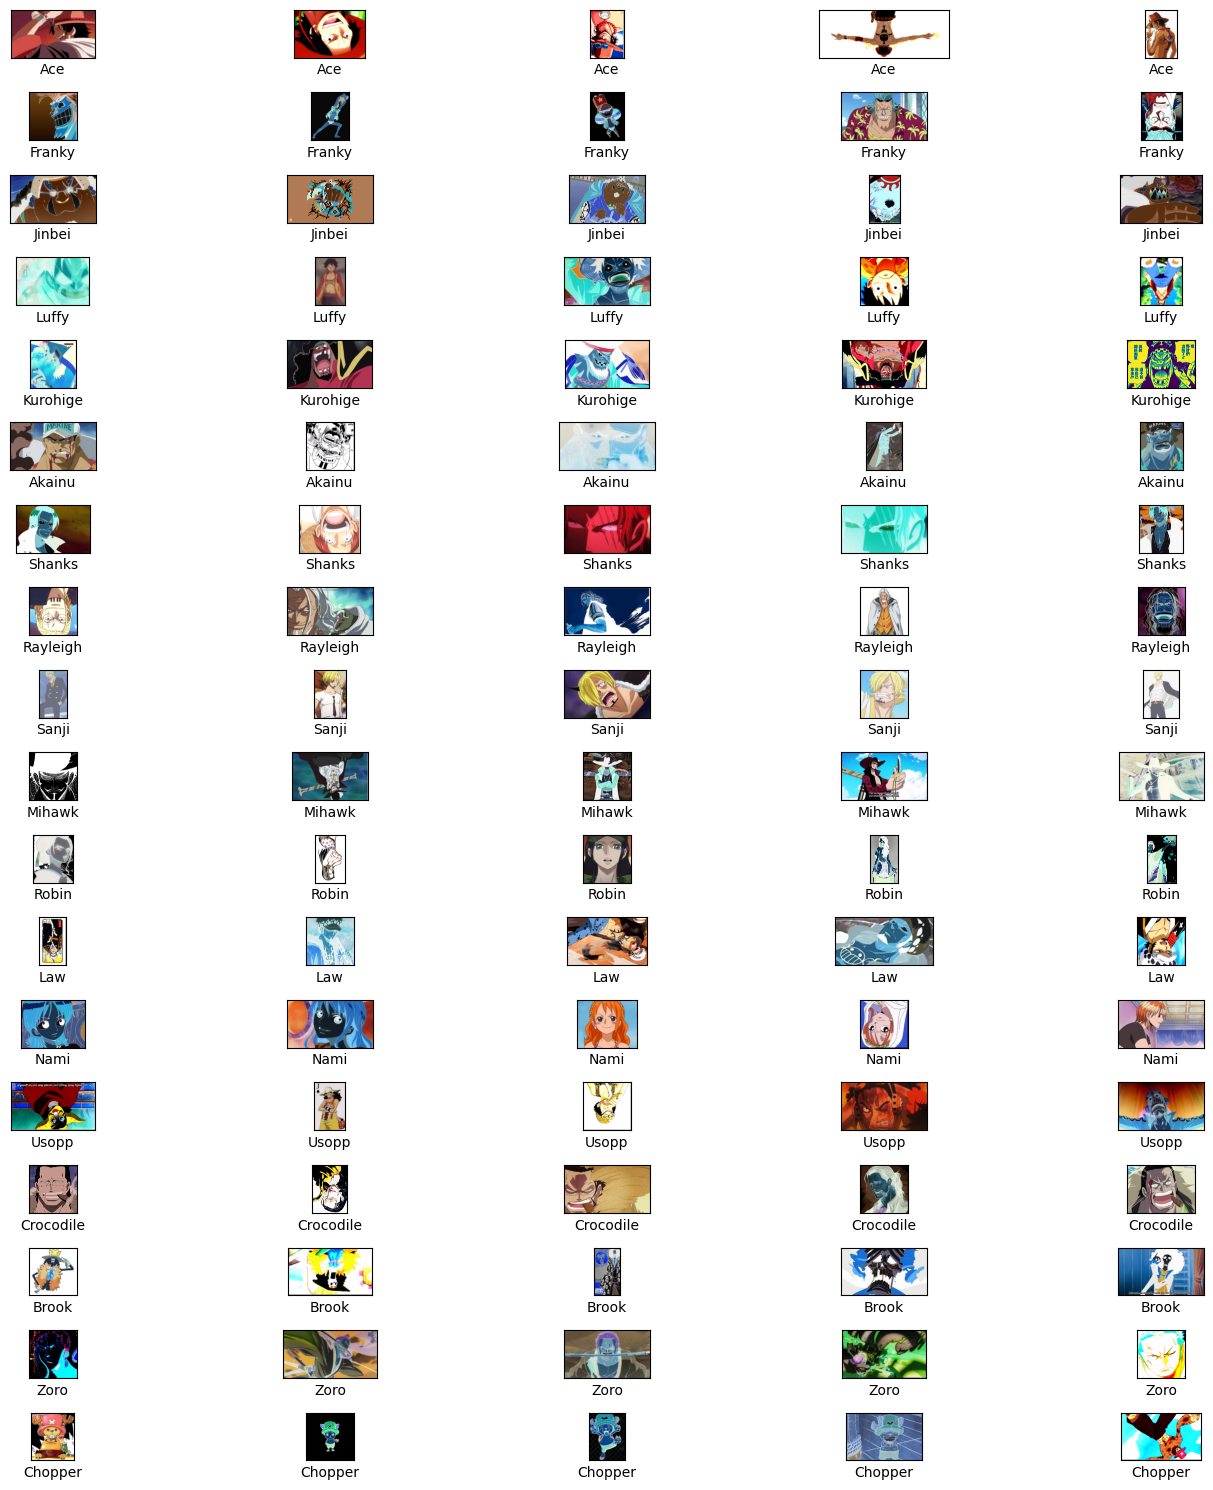

In [6]:
# Membuat kamus yang menyimpan gambar untuk setiap kelas dalam data
op_characters = {}

# Tentukan data_path sumber train
for i in os.listdir(data_path):
    op_characters[i] = os.listdir(os.path.join(data_path, i))

# Menampilkan secara acak 5 gambar di bawah setiap kelas dari data latih
fig, axs = plt.subplots(len(op_characters.keys()), 5, figsize=(15, 15))

for i, class_name in enumerate(os.listdir(data_path)):
    images = np.random.choice(op_characters[class_name], 5, replace=False)

    for j, image_name in enumerate(images):
        img_data_path = os.path.join(data_path, class_name, image_name)
        img = Image.open(img_data_path)
        axs[i, j].imshow(img)
        axs[i, j].set(xlabel=class_name, xticks=[], yticks=[])

fig.tight_layout()

**Dataset memiliki 3 buah kelas.**

In [7]:
total_images = 0

def get_total_files(folder_path):
  total_files = 0
  for filename in os.listdir(folder_path):
    file_path = os.path.join(folder_path, filename)
    if os.path.isfile(file_path):
      total_files += 1
  return total_files

folders = [f for f in os.listdir(data_path) if os.path.isdir(os.path.join(data_path, f))]
folders.sort()
for food in folders:
  total_files = get_total_files(f'{data_path}/{food}')
  print(f'Total files in {food} folder: {total_files}')
  total_images += total_files

print(f'\nTotal images: {total_images}')

Total files in Ace folder: 648
Total files in Akainu folder: 651
Total files in Brook folder: 657
Total files in Chopper folder: 648
Total files in Crocodile folder: 651
Total files in Franky folder: 651
Total files in Jinbei folder: 651
Total files in Kurohige folder: 648
Total files in Law folder: 651
Total files in Luffy folder: 654
Total files in Mihawk folder: 651
Total files in Nami folder: 665
Total files in Rayleigh folder: 651
Total files in Robin folder: 651
Total files in Sanji folder: 651
Total files in Shanks folder: 651
Total files in Usopp folder: 648
Total files in Zoro folder: 659

Total images: 11737


**Dataset yang digunakan berisi lebih dari 10000 gambar.**

In [17]:
def print_images_resolution(directory):
    unique_sizes = set()
    total_images = 0

    for subdir in os.listdir(directory):
        subdir_path = os.path.join(directory, subdir)
        image_files = os.listdir(subdir_path)
        num_images = len(image_files)
        print(f"{subdir}: {num_images}")
        total_images += num_images

        for img_file in image_files:
            img_path = os.path.join(subdir_path, img_file)
            with Image.open(img_path) as img:
                unique_sizes.add(img.size)

        for size in unique_sizes:
            print(f"- {size}")
        print("---------------")

    print(f"\nTotal: {total_images}")

print_images_resolution(data_path)

Ace: 648
- (750, 1000)
- (377, 885)
- (402, 402)
- (1100, 1100)
- (189, 267)
- (700, 501)
- (308, 242)
- (190, 268)
- (188, 344)
- (316, 502)
- (642, 514)
- (182, 282)
- (742, 372)
- (1282, 722)
- (196, 284)
- (360, 288)
- (478, 936)
- (165, 305)
- (636, 1778)
- (211, 183)
- (482, 408)
- (184, 184)
- (298, 169)
- (172, 182)
- (306, 182)
- (154, 332)
- (900, 512)
- (166, 306)
- (502, 502)
- (233, 216)
- (764, 1024)
- (640, 472)
- (342, 388)
- (1082, 1428)
- (388, 602)
- (272, 180)
- (146, 202)
- (260, 196)
- (1026, 620)
- (185, 269)
- (632, 836)
- (160, 212)
- (186, 270)
- (400, 468)
- (307, 240)
- (602, 850)
- (134, 178)
- (312, 1020)
- (1080, 2280)
- (225, 225)
- (674, 1192)
- (145, 201)
- (712, 446)
- (302, 440)
- (130, 212)
- (224, 228)
- (253, 273)
- (2557, 2049)
- (730, 612)
- (1082, 762)
- (116, 142)
- (989, 1217)
- (570, 321)
- (250, 478)
- (2562, 1602)
- (168, 170)
- (466, 767)
- (228, 221)
- (302, 170)
- (350, 592)
- (422, 370)
- (192, 164)
- (402, 602)
- (818, 428)
- (652, 65

**Gambar pada dataset memiliki resolusi yang tidak seragam.**

# Data Preprocessing

In [9]:
# Menentukan ukuran gambar, batch size, dan seed
seed = 42
batch_size = 32
width = 224
height = 224

## Split Dataset

In [10]:
# Membagi data menjadi data latih dan data validasi
train_dataset = preprocessing.image_dataset_from_directory(
    directory=data_path,
    validation_split=0.2,
    subset="training",
    seed=seed,
    image_size=(height,width),
    batch_size=batch_size
)

val_dataset = preprocessing.image_dataset_from_directory(
    directory=data_path,
    validation_split=0.2,
    subset="validation",
    seed=seed,
    image_size=(height, width),
    batch_size=batch_size
)

Found 11737 files belonging to 18 classes.
Using 9390 files for training.
Found 11737 files belonging to 18 classes.
Using 2347 files for validation.


**Dataset Dibagi Menjadi 80% Train Set dan 20% Validation Set.**

## Data Augmentation

In [11]:
#  Membuat layer data augmentation
data_augmentation = Sequential(
    layers=[
        tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical", input_shape=(height, width, 3)),
        tf.keras.layers.experimental.preprocessing.RandomRotation(0.2),
        tf.keras.layers.experimental.preprocessing.RandomZoom(0.2), 
        ], 
    name="data_augmentation"
    )

In [12]:
classes_count = len(train_dataset.class_names)
print(f"Number of classes: {classes_count}")

class_names = train_dataset.class_names
print(f"Class names: {class_names}")

Number of classes: 18
Class names: ['Ace', 'Akainu', 'Brook', 'Chopper', 'Crocodile', 'Franky', 'Jinbei', 'Kurohige', 'Law', 'Luffy', 'Mihawk', 'Nami', 'Rayleigh', 'Robin', 'Sanji', 'Shanks', 'Usopp', 'Zoro']


# Modelling

In [20]:
# Create the sequential model
model = Sequential()

# Load the pretrained model with its weights
base_model = MobileNet(input_shape=(width, height, 3), weights="imagenet", include_top=False)

# Add the data augmentation layer defined above
model.add(data_augmentation)

# Add the base model
model.add(base_model)

# Add the CNN layers
model.add(Conv2D(64, (3, 3), activation='relu'))

# Pooling
model.add(GlobalAveragePooling2D())  

# Normalize the data
model.add(BatchNormalization())

# Fully connected layers 
model.add(Dense(units=1024, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(units=512, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(units=256, activation="relu"))
model.add(Dropout(0.2))

# Output layer
model.add(Dense(classes_count, activation="sigmoid", name="final_output"))

**Model sudah menggunakan Sequential, Conv2D, Pooling Layer.**

In [21]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 data_augmentation (Sequent  (None, 224, 224, 3)       0         
 ial)                                                            
                                                                 
 mobilenet_1.00_224 (Functi  (None, 7, 7, 1024)        3228864   
 onal)                                                           
                                                                 
 conv2d_1 (Conv2D)           (None, 5, 5, 64)          589888    
                                                                 
 global_average_pooling2d_1  (None, 64)                0         
  (GlobalAveragePooling2D)                                       
                                                                 
 batch_normalization_1 (Bat  (None, 64)                256       
 chNormalization)                                     

In [22]:
# Compile the model
model.compile(
    optimizer= Adam(),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"])

In [23]:
# Define a custom callback to stop training when val_accuracy >= 95%
class StopTrainingAtAccuracy(Callback):
    def __init__(self, target_accuracy=0.95):
        super(StopTrainingAtAccuracy, self).__init__()
        self.target_accuracy = target_accuracy

    def on_epoch_end(self, epoch, logs=None):
        val_accuracy = logs.get('val_accuracy')
        if val_accuracy is not None and val_accuracy >= self.target_accuracy:
            print(f"\nReached {self.target_accuracy * 100}% validation accuracy, stopping training!")
            self.model.stop_training = True

# Instantiate the custom callback
stop_at_accuracy = StopTrainingAtAccuracy(target_accuracy = 0.95)

In [24]:
%%time

# Train the model
history = model.fit(
    train_dataset,
    validation_data = val_dataset,
    epochs = 100,
    verbose=1, 
    callbacks = [stop_at_accuracy]
)

Epoch 1/100
294/294 [==============================] - 62s 165ms/step - loss: 2.0050 - accuracy: 0.3949 - val_loss: 2.4871 - val_accuracy: 0.3822
Epoch 2/100
294/294 [==============================] - 49s 162ms/step - loss: 1.3718 - accuracy: 0.6040 - val_loss: 1.5769 - val_accuracy: 0.6076
Epoch 3/100
294/294 [==============================] - 49s 162ms/step - loss: 1.0756 - accuracy: 0.6996 - val_loss: 2.0904 - val_accuracy: 0.5053
Epoch 4/100
294/294 [==============================] - 49s 162ms/step - loss: 0.8732 - accuracy: 0.7513 - val_loss: 1.7295 - val_accuracy: 0.5765
Epoch 5/100
294/294 [==============================] - 49s 163ms/step - loss: 0.7865 - accuracy: 0.7802 - val_loss: 1.3458 - val_accuracy: 0.6549
Epoch 6/100
294/294 [==============================] - 48s 161ms/step - loss: 0.6745 - accuracy: 0.8111 - val_loss: 1.0943 - val_accuracy: 0.6915
Epoch 7/100
294/294 [==============================] - 49s 163ms/step - loss: 0.5993 - accuracy: 0.8317 - val_loss: 1.1280 -

## Evaluasi dan Visualisasi

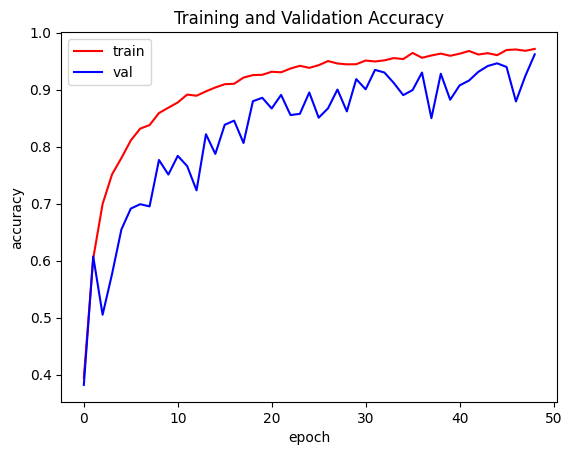

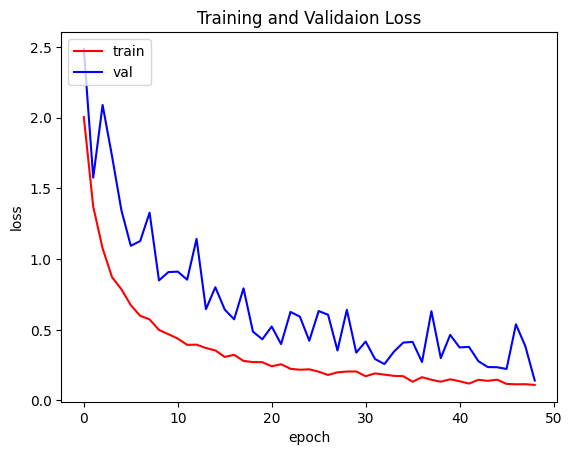

In [25]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r')
plt.plot(epochs, val_acc, 'b')
plt.title('Training and Validation Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(epochs, loss, 'r')
plt.plot(epochs, val_loss, 'b')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.title('Training and Validaion Loss')
plt.show()

# Konversi Model

## TFJS (TensorFlow.js)

In [57]:
model.save("model.h5")

/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [58]:
# Mengubah model.h5 kedalam bentuk json
!tensorflowjs_converter --input_format=keras model.h5 tfjs_model

2024-09-18 03:35:43.506382: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-18 03:35:43.527733: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-09-18 03:35:43.534112: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


## Saved Model (TensorFlow Serving)

In [59]:
save_path = os.path.join("saved_model")
tf.saved_model.save(model, save_path)

## TFLite (TensorFlow Lite)

In [60]:
converter = tf.lite.TFLiteConverter.from_saved_model(save_path)
tflite_model = converter.convert()

Summary on the non-converted ops:
---------------------------------
 * Accepted dialects: tfl, builtin, func
 * Non-Converted Ops: 66, Total Ops 107, % non-converted = 61.68 %
 * 66 ARITH ops

- arith.constant:   66 occurrences  (f32: 64, i32: 2)



  (f32: 15)
  (f32: 13)
  (f32: 4)
  (f32: 1)
  (f32: 1)
  (f32: 4)


In [63]:
tflite_model_file = Path('model.tflite')
tflite_model_file.write_bytes(tflite_model)

18075512